<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima -q

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 34.7 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
dateParse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/AirPassengers.csv',
                   parse_dates = ['Month'], index_col = 'Month', date_parser = dateParse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [8]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
time_series = data['#Passengers']
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [13]:
time_series[1]

118

In [11]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [12]:
time_series[datetime(1949,2,1)]

118

In [14]:
time_series[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [15]:
time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [16]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [17]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

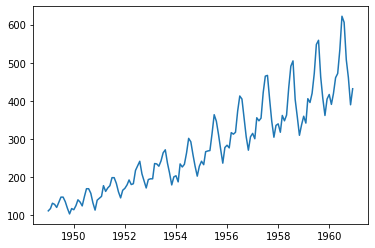

In [19]:
plt.plot(time_series);

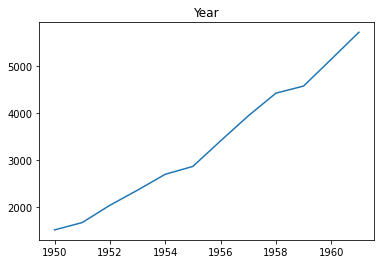

In [22]:
time_series_year = time_series.resample('A').sum()
plt.plot(time_series_year)
plt.title('Year');

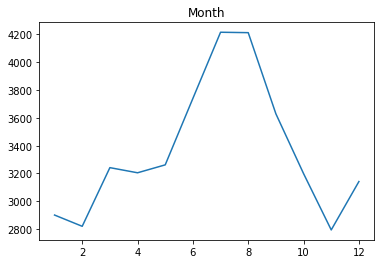

In [23]:
time_series_month = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_month)
plt.title('Month');

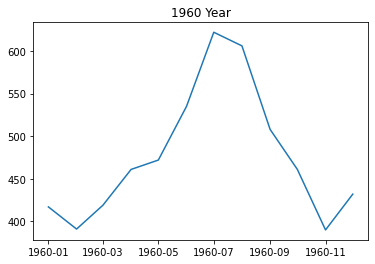

In [26]:
time_series_date = time_series['1960']
plt.plot(time_series_date)
plt.title('1960 Year');

# Decomposition

In [27]:
decomp = seasonal_decompose(time_series)
trend = decomp.trend
season = decomp.seasonal
rand = decomp.resid

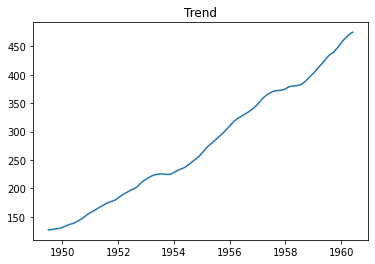

In [28]:
plt.plot(trend)
plt.title('Trend');

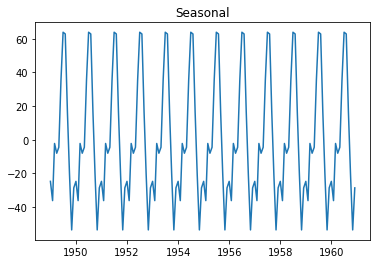

In [29]:
plt.plot(season)
plt.title('Seasonal');

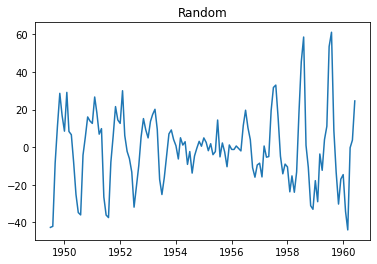

In [30]:
plt.plot(rand)
plt.title('Random');

# Prediction

In [35]:
model = auto_arima(time_series, order=(2,1,2))
pred = model.predict(n_periods=24)
pred

array([467.57401654, 490.49500228, 509.1373897 , 492.55512361,
       495.30611115, 475.94779765, 476.33978849, 475.55210622,
       472.35391134, 483.88982165, 475.57040329, 485.92175018,
       479.13379925, 480.98759619, 482.22151092, 476.21115582,
       483.94293393, 475.84749094, 482.79441626, 479.01210197,
       479.51880696, 482.44959227, 476.97410358, 483.51116704])

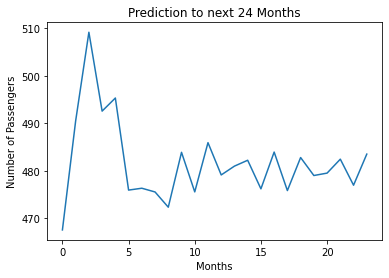

In [36]:
plt.plot(pred)
plt.title('Prediction to next 24 Months')
plt.xlabel('Months')
plt.ylabel('Number of Passengers');

In [37]:
train = time_series[:130]
train.shape

(130,)

In [39]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [40]:
test = time_series[130:]
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [43]:
model_2 = auto_arima(train)
pred = pd.DataFrame(model_2.predict(n_periods=14), index=test.index)
pred.columns = ['passengers_predictions']
pred

,passengers_predictions
Month,
1959-11-01,357.690515
1959-12-01,334.857455
1960-01-01,342.488597
1960-02-01,375.944534
1960-03-01,424.126290
1960-04-01,473.151448
1960-05-01,510.388385
1960-06-01,527.724250
1960-07-01,523.268338


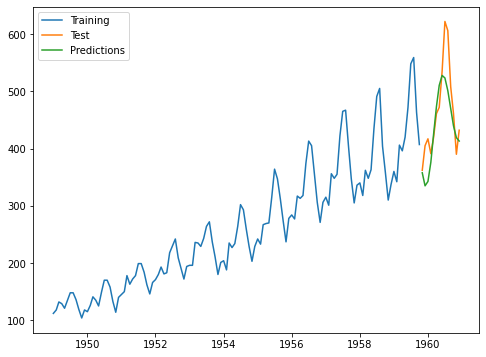

In [45]:
plt.figure(figsize=(8,6))
plt.plot(train, label = 'Training')
plt.plot(test, label='Test')
plt.plot(pred, label = 'Predictions')
plt.legend();